In [1]:
import sys
import seaborn as sns
sys.path.append("..")
%matplotlib inline
sns.set(rc={'image.cmap': 'Purples_r'})

#Experiment Database

In [2]:
import lib.ngdb as ngdb
import lib.ngsimu as ngsimu

Using *ngdb* instead of *ngsimu*, we create Experiments objects that are re-usable via a database. Execute the code below, and a second time for the graph().show() part, you will notice the difference between the 2 libs (testexp is ngdb.Experiment, testexp2 is ngsimu.Experiment).

In [3]:
M=5
W=10
voctype="sparse_matrix"
strat={"strattype":"naive"}
nb_ag=10
T_step=10

testexp=ngdb.Experiment(voctype=voctype,strat=strat,nbagent=nb_ag,M=M,W=W,step=T_step)
testexp
testexp2=ngsimu.Experiment(voctype=voctype,strat=strat,nbagent=nb_ag,M=M,W=W,step=T_step)
testexp2

In [9]:
testexp.continue_exp_until(100)
testexp2.continue_exp_until(100)

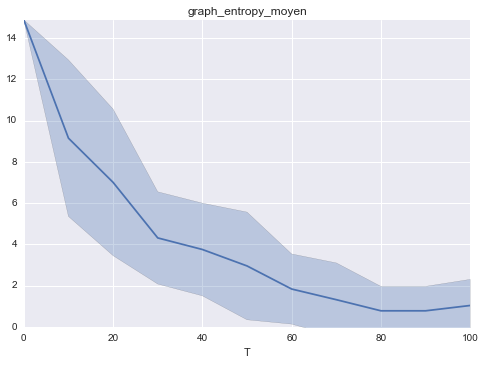

In [10]:
testexp.graph("entropy").show()


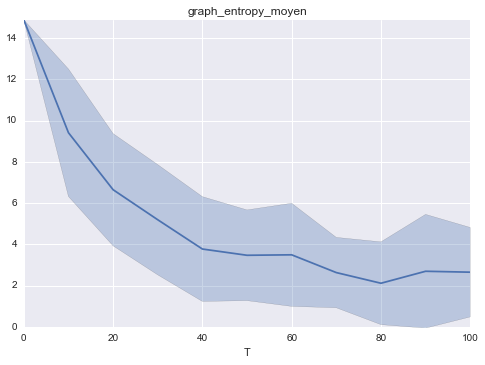

In [11]:
testexp2.graph("entropy").show()

##Get back existing experiments, merge DBs, and plot with different abscisse

In [4]:
db=ngdb.NamingGamesDB("ng2.db")

In [5]:
testexp3=db.get_experiment(M=M,strat=strat,W=6,voctype=voctype,nbagent=nb_ag,step=T_step)

In [6]:
testexp3.continue_exp_until(200)

In [7]:
db.merge("naminggames.db",remove=False)

In [13]:
testexp3=db.get_experiment(M=7,strat=strat,W=8,voctype=voctype,nbagent=12,step=T_step,force_new=True)

In [14]:
testexp3.continue_exp_until(100)

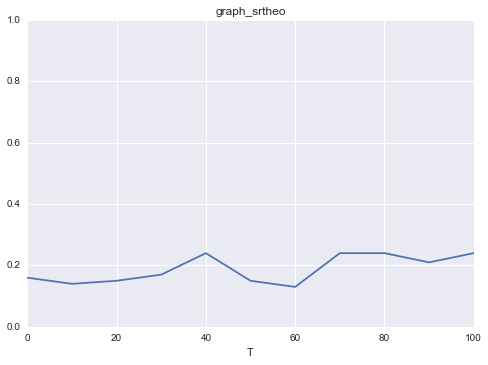

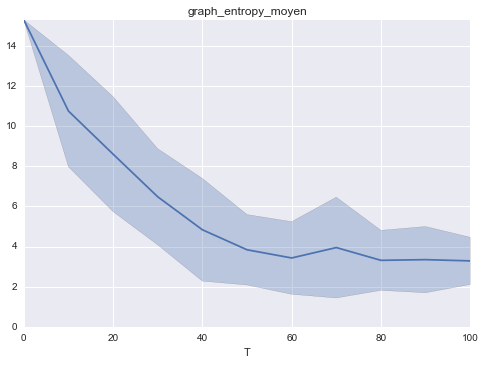

In [15]:
testexp3.graph("srtheo").show()
testexp3.graph("entropy").show()

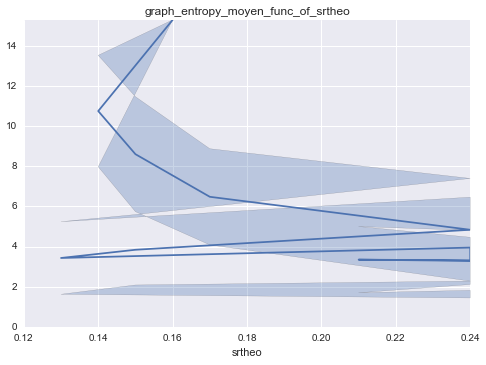

In [16]:
testexp3.graph("entropy",X="srtheo").show()

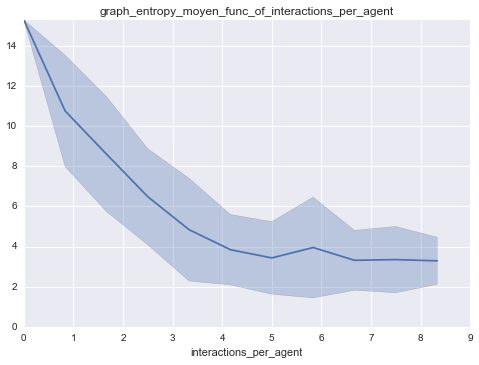

In [17]:
testexp3.graph("entropy",X="interactions_per_agent").show()